In [2]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

MATRIX FACTORIZATION MODEL

In [ ]:
class MatrixFactorizationModel(nn.Module):
    def __init__(self, num_users, num_movies, num_factors):
        super(MatrixFactorizationModel, self).__init__()
        self.user_factors = nn.Embedding(num_users, num_factors)
        self.movie_factors = nn.Embedding(num_movies, num_factors)

    def forward(self, user, movie):
        user_factor = self.user_factors(user)
        movie_factor = self.movie_factors(movie)
        interaction = (user_factor * movie_factor).sum(1, keepdim=True)
        return interaction.squeeze()

# Initialize the Matrix Factorization Model
num_factors = 200
model = MatrixFactorizationModel(len(unique_users), len(unique_movies), num_factors)
model = model.to(device)
    
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [51]:
def average_precision_at_k(actual, predicted, k):
    """
    Compute the average precision at k.
    Parameters:
    actual (list): A list of actual relevant items
    predicted (list): A list of predicted items
    k (int): The number of predicted items to consider
    Returns:
    The average precision at k.
    """
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=5):
    """
    Compute the mean average precision at k.
    Parameters:
    actual (dict): A dictionary containing the actual relevant items for each user.
    predicted (dict): A dictionary containing the predicted items for each user.
    k (int): The number of predicted items to consider
    Returns:
    The mean average precision at k.
    """
    map_values = []
    for user, items in predicted.items():
        if user not in actual or not items:
            continue
        else:
            ap = average_precision_at_k(actual[user], items, k)
            map_values.append(ap)
    return sum(map_values) / len(map_values)

TRAINING THE MODEL USING MAP@K, K=10

In [121]:
# from tqdm import tqdm
# # Train the model
# num_epochs = 5

# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0.0

#     for user, movie, rating in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
#         optimizer.zero_grad()
#         user = user.long().to(device)
#         movie = movie.long().to(device)
#         rating = rating.float().view(-1, 1).to(device)
#         prediction = model(user, movie).view(-1,1)
#         loss = criterion(prediction, rating)
#         loss.backward()
#         optimizer.step()
#         train_loss += sqrt(loss.item())

#     train_loss /= len(train_loader)

#     model.eval()
#     val_loss = 0.0
#     val_mapk = 0.0
#     num_users = 0
#     mov_usr = dict()
#     with torch.no_grad():
#         for user, movie, rating in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
#             for i, us in enumerate(user):
#                 u, m, r = us.item(), movie[i].item(), rating[i].item()
#                 if u not in mov_usr and r>2:
#                     mov_usr[u] = [m]
#                 elif r>2:
#                     mov_usr[u].append(m)

#     with torch.no_grad():
#         for user, movie, rating in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
#             user = user.long().to(device)
#             movie = movie.long().to(device)
#             rating = rating.float().view(-1, 1).to(device)

#             prediction = model(user, movie)
#             loss = criterion(prediction, rating)

#             val_loss += sqrt(loss.item())

#             # Calculate map@k
#             actual_ratings = rating.cpu().numpy()
#             predicted_ratings = prediction.cpu().numpy()
#             pred_dict = dict()
#             for i, pr in enumerate(predicted_ratings):
#                 if pr>2: 
#                     us, mo = user[i].item(), movie[i].item()
#                     if us in pred_dict:
#                         pred_dict[us].append(mo)
#                     else:
#                         pred_dict[us] = [mo]
#             val_mapk += mapk(mov_usr, pred_dict, k=10)
#             num_users += 1 #user.shape[0]

#     val_loss /= len(val_loader)
#     val_mapk /= num_users
#     val_rmse = sqrt(val_loss)

#     print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")#", Train MAP@k: {train_mapk:.4f}")
#     print(f"Validation RMSE: {val_rmse:.4f}, Validation MAP@10: {val_mapk:.4f}")


Epoch 1/5 - Validation: 100%|█████████▉| 5865/5888 [00:19<00:00, 367.96it/s]/Users/anushribhansali/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([272, 1])) that is different to the input size (torch.Size([272])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 1/5 - Validation: 100%|██████████| 5888/5888 [00:19<00:00, 307.84it/s]


Epoch 1/5, Train Loss: 9.4127, Validation Loss: 7.1873
Validation RMSE: 2.6809, Validation MAP@5: 0.1370


Epoch 2/5 - Validation: 100%|██████████| 5888/5888 [00:21<00:00, 273.92it/s]


Epoch 2/5, Train Loss: 4.5743, Validation Loss: 4.9471
Validation RMSE: 2.2242, Validation MAP@5: 0.1419


Epoch 3/5 - Validation: 100%|██████████| 5888/5888 [00:22<00:00, 262.18it/s]


Epoch 3/5, Train Loss: 2.2920, Validation Loss: 4.1772
Validation RMSE: 2.0438, Validation MAP@5: 0.1472


Epoch 4/5 - Validation: 100%|██████████| 5888/5888 [00:23<00:00, 246.94it/s]


Epoch 4/5, Train Loss: 1.5858, Validation Loss: 3.8880
Validation RMSE: 1.9718, Validation MAP@5: 0.1491


Epoch 5/5 - Validation: 100%|██████████| 5888/5888 [00:23<00:00, 245.69it/s]

Epoch 5/5, Train Loss: 1.4007, Validation Loss: 3.7223
Validation RMSE: 1.9293, Validation MAP@5: 0.1499


TRAINING THE MODEL USING MAP@K, K=5

In [52]:
from tqdm import tqdm
# Train the model
num_epochs = 5

# Lists to store training and validation losses for each epoch
train_losses = []
val_losses = []

# Lists to store validation metrics for each epoch
val_mapks = []
val_rmses = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for user, movie, rating in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        optimizer.zero_grad()
        user = user.long().to(device)
        movie = movie.long().to(device)
        rating = rating.float().view(-1, 1).to(device)
        prediction = model(user, movie).view(-1,1)
        loss = criterion(prediction, rating)
        loss.backward()
        optimizer.step()
        train_loss += sqrt(loss.item())

    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0.0
    val_mapk = 0.0
    num_users = 0
    mov_usr = dict()
    with torch.no_grad():
        for user, movie, rating in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            for i, us in enumerate(user):
                u, m, r = us.item(), movie[i].item(), rating[i].item()
                if u not in mov_usr and r>2:
                    mov_usr[u] = [m]
                elif r>2:
                    mov_usr[u].append(m)

    with torch.no_grad():
        for user, movie, rating in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            user = user.long().to(device)
            movie = movie.long().to(device)
            rating = rating.float().view(-1, 1).to(device)

            prediction = model(user, movie)
            loss = criterion(prediction, rating)

            val_loss += sqrt(loss.item())

            # Calculate map@k
            actual_ratings = rating.cpu().numpy()
            predicted_ratings = prediction.cpu().numpy()
            pred_dict = dict()
            for i, pr in enumerate(predicted_ratings):
                if pr>2: 
                    us, mo = user[i].item(), movie[i].item()
                    if us in pred_dict:
                        pred_dict[us].append(mo)
                    else:
                        pred_dict[us] = [mo]
            val_mapk += mapk(mov_usr, pred_dict, k=5)
            num_users += 1 #user.shape[0]

    val_loss /= len(val_loader)
    val_mapk /= num_users
    val_rmse = sqrt(val_loss)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_mapks.append(val_mapk)
    val_rmses.append(val_rmse)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")#", Train MAP@k: {train_mapk:.4f}")
    print(f"Validation RMSE: {val_rmse:.4f}, Validation MAP@5: {val_mapk:.4f}")


Epoch 1/5 - Validation:   0%|          | 0/5888 [00:00<?, ?it/s]/Users/anushribhansali/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([512, 1])) that is different to the input size (torch.Size([512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 1/5 - Validation: 100%|█████████▉| 5886/5888 [00:16<00:00, 387.57it/s]/Users/anushribhansali/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([272, 1])) that is different to the input size (torch.Size([272])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 1/5 - Validation: 100%|██████████| 5888/5888 [00:16<00:00, 351.23it/s]


Epoch 1/5, Train Loss: 10.4878, Validation Loss: 7.5355
Validation RMSE: 2.7451, Validation MAP@5: 0.2031


Epoch 2/5 - Validation: 100%|██████████| 5888/5888 [00:19<00:00, 295.47it/s]


Epoch 2/5, Train Loss: 4.9833, Validation Loss: 5.1324
Validation RMSE: 2.2655, Validation MAP@5: 0.2068


Epoch 3/5 - Validation: 100%|██████████| 5888/5888 [00:28<00:00, 209.51it/s]


Epoch 3/5, Train Loss: 2.4500, Validation Loss: 4.2277
Validation RMSE: 2.0561, Validation MAP@5: 0.2105


Epoch 4/5 - Validation: 100%|██████████| 5888/5888 [00:21<00:00, 272.97it/s]


Epoch 4/5, Train Loss: 1.6315, Validation Loss: 3.9107
Validation RMSE: 1.9776, Validation MAP@5: 0.2122


Epoch 5/5 - Validation: 100%|██████████| 5888/5888 [00:22<00:00, 261.54it/s]

Epoch 5/5, Train Loss: 1.4130, Validation Loss: 3.7360
Validation RMSE: 1.9329, Validation MAP@5: 0.2129


SHOWING TRAINING LOSS, VALIDATION LOSS, VALIDATION RMSE, VALIDATION MAP@5:

In [53]:
dict({"Train Loss:": train_losses, "Validation Loss": val_loss, "Validation RMSE": val_rmse, "Validation MAP@5": val_mapk})

{'Train Loss:': [10.487775889192122,
  4.983280854214332,
  2.450031795158729,
  1.6314785867793502,
  1.4130377668252332],
 'Validation Loss': 3.736048196490668,
 'Validation RMSE': 1.9328859760706703,
 'Validation MAP@5': 0.21291116073048144}

PLOTTING THE LOSSES:

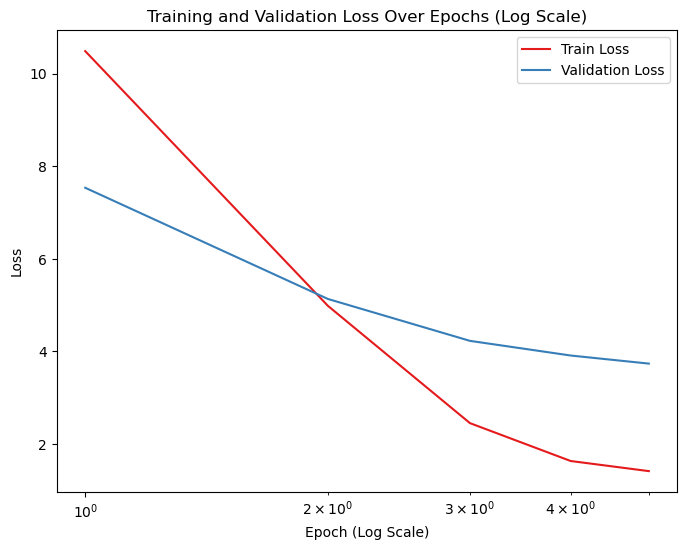

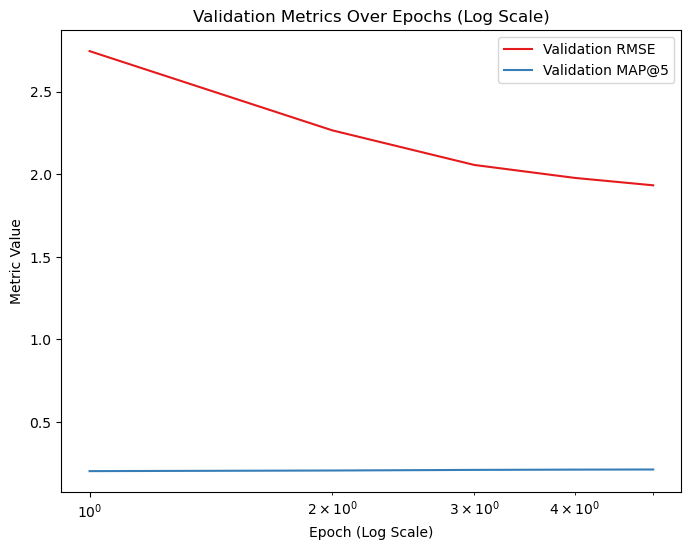

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the training and validation losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch (Log Scale)')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs (Log Scale)')
plt.legend()
plt.savefig('training_validation_loss.png')
plt.show()

# Plot MAP@5 and RMSE:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), val_rmses, label='Validation RMSE')
plt.plot(range(1, num_epochs + 1), val_mapks, label='Validation MAP@5')
plt.xlabel('Epoch (Log Scale)')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.ylabel('Metric Value')
plt.title('Validation Metrics Over Epochs (Log Scale)')
plt.legend()
plt.savefig('validation_metrics.png')
plt.show()

GENERATING RECOMMENDARIONS:

In [66]:
user_id = 72153  # Replace with the user ID you are interested in
all_movie_ids = range(len(unique_movies))  # Assuming unique_movies contains all movie IDs

# Convert to PyTorch tensors
user_tensor = torch.tensor([user_id] * len(all_movie_ids)).to(device)
movies_tensor = torch.tensor(all_movie_ids).to(device)

# Predict ratings
model.eval()
with torch.no_grad():
    predictions = model(user_tensor, movies_tensor).cpu().numpy()

# Sort the predictions
recommended_movie_ids = np.argsort(-predictions)  # IDs of movies with the highest predicted ratings

# Optionally filter out movies the user has already watched
watched_movies = set(final_data[final_data['CustomerID'] == user_id]['MovieID'])
recommended_movie_ids = [mid for mid in recommended_movie_ids if mid not in watched_movies]

# Get top N recommendations
print("Movies the user has already watched: ", watched_movies)
top_n_recommendations = recommended_movie_ids[:5]  # Top 5 recommendations
print("5 Reccomendations:", top_n_recommendations )

Movies the user has already watched:  {5888, 382, 1156, 261, 3462, 2822, 6152, 522, 10, 269, 17, 146, 2321, 3474, 21, 5526, 536, 1049, 538, 8216, 8988, 1435, 1054, 2462, 679, 1320, 3625, 6956, 173, 3519, 8130, 323, 964, 1093, 326, 2373, 1862, 3529, 4042, 456, 8143, 209, 1365, 8151, 3801, 1757, 610, 11875, 483, 104, 8171, 4977, 628, 6262, 1022}
5 Reccomendations: [13233, 14371, 7970, 1977, 7141]
